In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline 

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на дополнительном занятии (**N декабря в M часов**).  
Ссылка на шаблон к презентации: [ссылка](https://docs.google.com/presentation/d/1IJRb8SGiHm2BnjQ-MJXXFrzzjCUf1FhCCG6QDHDPin0/edit?usp=sharing).  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы, после чего вернутся к вам с фидбеком. 

Вопросы, на которые нужно ответить в презентации: 
- сколько рейтинговых групп представлено в данных?
- какие оценки пользователи ставят чаще всего?
- какие оценки пользователи ставят в среднем?
- в какие годы были запущены шоу?
- можно ли сделать вывод, что 2017 год успешнее для Netflix?
- в каких рейтинговых группах запущены шоу на Netflix?
- выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :) 

Вопросы ниже помогут вам ответить на вопросы из презентации и сопроводить выводы релевантной визуализацией. 

Любой хороший data-scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

При возникновении каких-либо проблем при выполнении группового проекта обязательно сразу пишите мне (@azukhba). 


## Решение

Скачайте данные: [ссылка](https://drive.google.com/file/d/1jN8W_OQWm2Wryvn6rrSm58no679X_be_/view?usp=sharing). Загрузите данные, выполнив код ниже.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving netflix_data.csv to netflix_data (2).csv


In [ ]:
# код ниже менять нельзя, просто запустите ячейку!
data = pd.read_csv("netflix_data.csv", encoding='cp437')
del data['ratingDescription'], data['user rating size']

In [ ]:
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN
998,Beary Tales,TV-G,Suitable for all ages.,2013,NaN


### Чистка данных

Удалите из данных дупликаты. 

In [ ]:
data = data.drop_duplicates()

Посмотрим на количество отсутсвующих значений

In [ ]:
def count_nan_value(df):
    """
        Функция для подсчета количества пустых значений и возращающий словарь вида:
        {
            <column name>: <percentage>
        }
    """
    counter = dict()
    size = df.shape[0]
    
    for col in df:
        counter[col] = round(df[col].isna().sum() / size, 2)
    
    return counter

In [ ]:
count_nan_value(data)

{'title': 0.0,
 'rating': 0.0,
 'ratingLevel': 0.07,
 'release year': 0.0,
 'user rating score': 0.49}

Так как __49%__ значений признаков __user rating score__ отсутсвует, то принимаем решения удалить данные с пустыми значениями. Заполнить пустые значения медианой/средним исказило бы выборку.

In [ ]:
data = data.dropna()

### Количество рейтинговых групп и гистограмма оценок 

Сколько рейтинговых групп представлено в данных?

In [ ]:
rating = data['rating'].unique()

print(f'Количество групп - {len(rating)}')
print('Группы:')
print('\n'.join(rating))

Количество групп - 12
Группы:
PG-13
TV-14
TV-PG
TV-MA
NR
TV-Y
TV-Y7-FV
PG
R
TV-G
G
TV-Y7


Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

Text(0.5, 1.0, 'Распределение оценок')

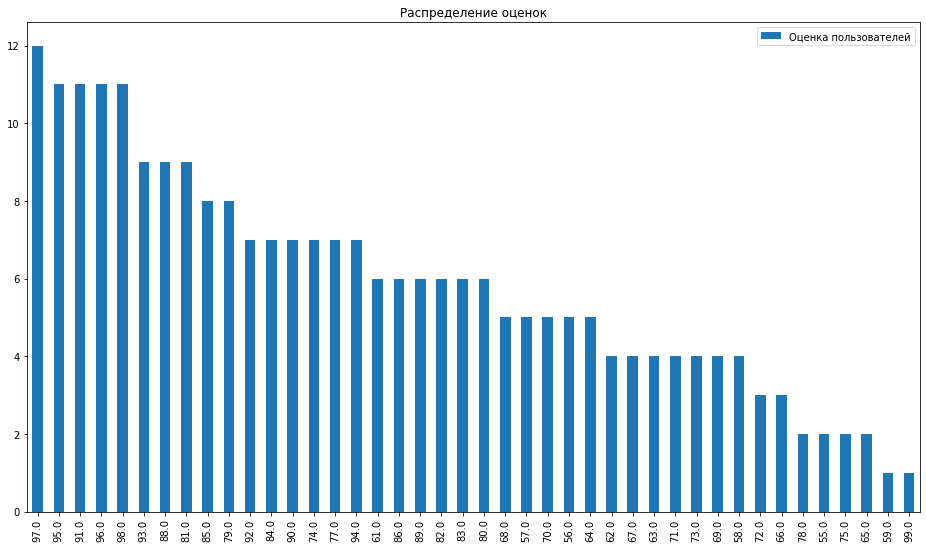

In [ ]:
dist_user_rating_score = data['user rating score'].value_counts()
dist_user_rating_score.plot(kind='bar', label='Оценка пользователей', figsize=(16, 9))
plt.legend()
plt.title('Распределение оценок')

#### Вывод

Пользователи макисмальные оценки (__99__, __100__) предпочатают не ставить. Чаще всего предпочитают средние и высокие оценки

### Основаная информация об оценках пользователей

Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

In [ ]:
data['user rating score'].describe()[['mean', 'std', 'min', 'max', '50%']]

mean    81.390244
std     12.677883
min     55.000000
max     99.000000
50%     83.500000
Name: user rating score, dtype: float64

#### Ответ:

Среднее значение от медианы отличается несущественно.
Значительное отличие характеристик могло быть связано с выбросами в выборке. Например, если бы пользователи ставили рейтинг к шоу, равный 0.

### Годы запусков шоу и распределение количества шоу в зависимости от года

В какие годы были запущены шоу, представленные в датасете?

In [ ]:
years = data['release year'].unique()
print(f'Годы запусков шоу: {years}')

Годы запусков шоу: [2004 2016 2008 2014 2013 2017 2015 2006 2012 2003 2011 2010 1998 1999
 1978 2007 2009 2005 2001 1993 2002 2000 1994 1997 1982 1990 1940 1986
 1995 1992 1987 1989]


Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

Text(0.5, 1.0, 'Распределение количества запущенных шоу')

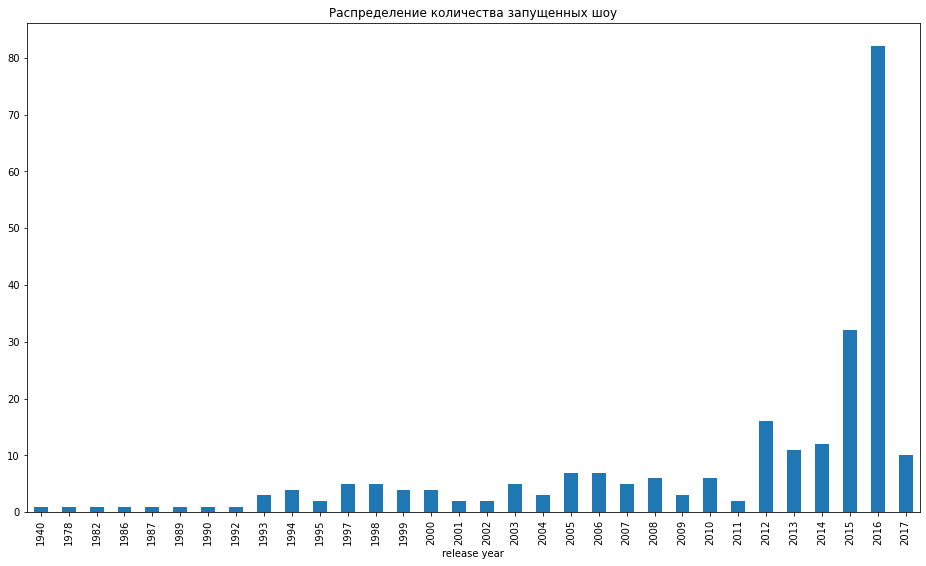

In [ ]:
dist_count_runn_shows = data.value_counts('release year')
sort_index = dist_count_runn_shows.index.sort_values()

dist_count_runn_shows[sort_index].plot(kind='bar', figsize=(16, 9))
plt.title('Распределение количества запущенных шоу')

#### Определим выбросы

Для этого воспользуемся правилом +-1.5IQR

In [ ]:
distribution_shows = data['release year'].value_counts()

Q1 = np.percentile(distribution_shows, 25)
Q3 = np.percentile(distribution_shows, 75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

not_emissions = set(distribution_shows[(distribution_shows > lower) & (distribution_shows < upper)].index)
emissions = set(distribution_shows.index) - not_emissions

print(f'Выбросы - {emissions}')

Выбросы - {2016, 2012, 2015}


Построим график без учета выбросов

Text(0.5, 1.0, 'Распределение количества запущенных шоу без учета выбросов')

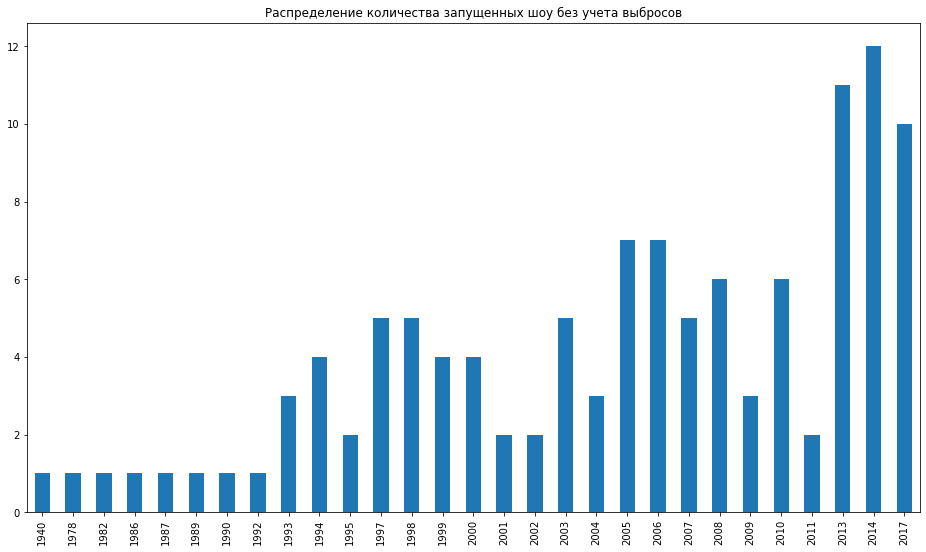

In [ ]:
sort_index = [distribution_shows[not_emissions].index.sort_values()]
distribution_shows[sort_index and not_emissions].plot(kind='bar', figsize=(16, 9))
plt.title('Распределение количества запущенных шоу без учета выбросов')

#### Вывод

В выборке существует выбросы по количеству запущенных шоу, а именно 2012, 2015, 2016 года.
Количество запущенных шоу увеличивается каждые несколько периодов

### Сравнивание средней оценки пользователей в 2016 со средней оценкой в 2017

Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)  
Ответить на этот вопрос вам поможет график, который вы построили выше.



In [ ]:
data.groupby('release year')['user rating score'].describe().loc[[2016, 2017]]

,count,mean,std,min,25%,50%,75%,max
release year,,,,,,,,
2016,82.0,85.060976,12.221563,56.0,77.25,90.0,95.0,98.0
2017,10.0,87.000000,8.096639,72.0,81.25,89.0,92.5,99.0


#### Вывод

Нельзя сказать что 2017 год был успешнее для Netflix, так как средняя оценка за 2017 год выше не значительно, а за 2016 год было запущено гораздо больше шоу.

### Распределение шоу по рейтинговым группам

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

Text(0.5, 1.0, 'Распределение рейтингов')

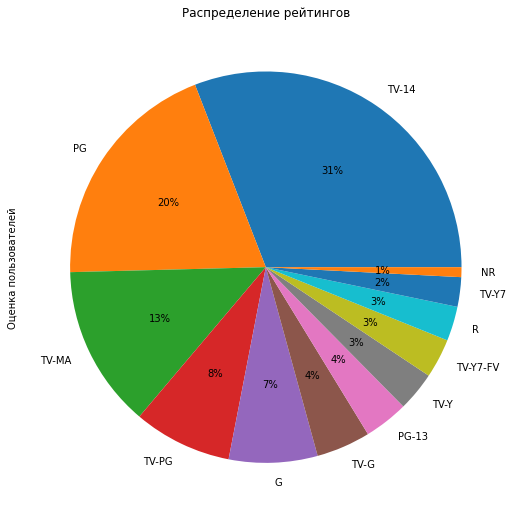

In [ ]:
data['rating'].value_counts().plot(kind='pie', label='Оценка пользователей', figsize=(16, 9), autopct='%1.0f%%')
plt.title('Распределение рейтингов')

#### Вывод

Визуально интепретировать проще диаграмму

### Сравнивание шоу

Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :) Аналитики и data-scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

In [ ]:
# Напишем функцию для поиска сиквелов
import re


def find_coincidences(word_list, reg):
  """
    Функция для поиска совпадения подстроки с заданным словом в списке строк
  """

  return list(
    filter(
      lambda condidate: re.match(reg, condidate.lower()),
      word_list
    )
  )


def find_sequels(name_prequels_with_year, name_column_with_year, data, prefix=2):
  """
    Функция для поиска приквела с перфиксом в датасете
  """
  titles = list(data.sort_values(by=name_column_with_year)[name_prequels_with_year])
  show_and_sequel = dict()

  for i in range(len(titles)):
    title = titles[i]
    sequels = [sequel for sequel in find_coincidences(titles[i+1:], rf'^{re.escape(title).lower()} {prefix}') if sequel != title]
    
    if len(sequels) == 0:
      continue
    
    show_and_sequel[title]  = sequels[0]
  
  return show_and_sequel


Найдем шоу с сиквелами



In [ ]:
show_and_sequel = find_sequels('title', 'release year', data)

In [ ]:
prequels_netflix = data.set_index('title').loc[show_and_sequel.keys()]

In [ ]:
sequels_netflix = data.set_index('title').loc[show_and_sequel.values()]

Сравним приквелы и сиквелы

In [ ]:
prequels_netflix

,rating,ratingLevel,release year,user rating score
title,,,,
Scooby-Doo,PG,"some rude humor, language and some scary action",2002,86.0
Lilo & Stitch,PG,mild sci-fi action,2002,95.0
High School Musical,TV-G,Suitable for all ages.,2006,64.0


In [ ]:
prequels_netflix['user rating score'].describe()

count     3.000000
mean     81.666667
std      15.947832
min      64.000000
25%      75.000000
50%      86.000000
75%      90.500000
max      95.000000
Name: user rating score, dtype: float64

In [ ]:
sequels_netflix['user rating score'].describe()

count     3.000000
mean     75.000000
std      14.798649
min      58.000000
25%      70.000000
50%      82.000000
75%      83.500000
max      85.000000
Name: user rating score, dtype: float64

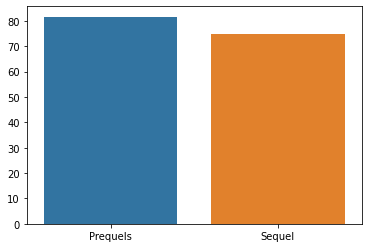

In [ ]:
sns.barplot(
    x=['Prequels', 'Sequel'],
    y=[prequels_netflix['user rating score'].describe()['mean'], sequels_netflix['user rating score'].describe()['mean']],
)

In [ ]:
(sequels_netflix['release year'] - list(prequels_netflix['release year'])).describe()

count    3.0
mean     2.0
std      1.0
min      1.0
25%      1.5
50%      2.0
75%      2.5
max      3.0
Name: release year, dtype: float64

#### Вывод
1. Средняя оценка сиквелов ниже, чем у оригинальных шоу
2. Половина сиквелов выходила спустя 2 года.

### Проверим вывод о средней оценки для сиквелов на другом наборе данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
shows_from_imdb = pd.read_csv('./drive/MyDrive/shows_from_imdb.csv')
del shows_from_imdb['Unnamed: 0']

In [ ]:
shows_from_imdb = shows_from_imdb.drop_duplicates(subset=['title'])

In [ ]:
years = shows_from_imdb['year']
new_years = list()

for year in years:
  new_years.append(int(year.split('–')[0]))

shows_from_imdb['year'] = new_years

In [ ]:
shows_from_imdb

,title,year,imdb_score
0,White Chicks,2004,5.7
1,Little Man,2006,4.4
2,Scary Movie,2000,6.2
3,Scary Movie 2,2001,5.3
4,Scary Movie 3,2003,5.5
...,...,...,...
1147,Mighty Ducks,1996,6.4
1152,"Honey, I Blew Up the Kid",1992,4.8
1156,Who Framed Roger Rabbit,1988,7.7
1157,"Honey, We Shrunk Ourselves!",1997,4.9


#### Посмотрим на распределение для оригинального шоу и второго сиквела

In [ ]:
sequels_and_prequels_2 = find_sequels('title', 'year', shows_from_imdb, 2)

In [ ]:
prequels_imdb_2 = shows_from_imdb.set_index('title').loc[sequels_and_prequels_2.keys()]

In [ ]:
sequels_imdb_2 = shows_from_imdb.set_index('title').loc[sequels_and_prequels_2.values()]

In [ ]:
prequels_imdb_2.describe()

,year,imdb_score
count,20.000000,20.000000
mean,2003.300000,6.850000
std,15.711545,0.904084
min,1940.000000,5.400000
25%,2002.500000,6.075000
50%,2008.000000,6.900000
75%,2010.000000,7.625000
max,2014.000000,8.300000


In [ ]:
sequels_imdb_2.describe()

,year,imdb_score
count,20.000000,20.000000
mean,2008.850000,6.365000
std,5.612721,0.948281
min,1999.000000,5.100000
25%,2004.750000,5.500000
50%,2011.000000,6.250000
75%,2013.000000,7.225000
max,2017.000000,7.900000


In [ ]:
(sequels_imdb_2['year'] - list(prequels_imdb_2['year'])).describe()

count    20.000000
mean      5.550000
std      12.617761
min       1.000000
25%       2.000000
50%       3.000000
75%       3.250000
max      59.000000
Name: year, dtype: float64

##### Вывод

Средняя оценка приквела и второго продолжения отличается не значительно. В 50% зрителям пришлось ждать продолжение 3 года

#### Посмотрим на распределение для оригинального шоу и третьего сиквела

In [ ]:
sequels_and_prequels_3 = find_sequels('title', 'year', shows_from_imdb, 3)

In [ ]:
prequels_imdb_3 = shows_from_imdb.set_index('title').loc[sequels_and_prequels_3.keys()]

In [ ]:
sequels_imdb_3 = shows_from_imdb.set_index('title').loc[sequels_and_prequels_3.values()]

In [ ]:
prequels_imdb_3.describe()

,year,imdb_score
count,7.000000,7.000000
mean,2004.000000,7.071429
std,6.928203,0.765320
min,1990.000000,6.100000
25%,2003.000000,6.350000
50%,2006.000000,7.600000
75%,2008.000000,7.650000
max,2010.000000,7.800000


In [ ]:
sequels_imdb_3.describe()

,year,imdb_score
count,7.000000,7.000000
mean,2009.571429,5.771429
std,7.276839,0.855793
min,1997.000000,4.500000
25%,2006.500000,5.250000
50%,2010.000000,6.000000
75%,2015.000000,6.150000
max,2017.000000,7.100000


In [ ]:
sequels_imdb_3.describe()

,year,imdb_score
count,7.000000,7.000000
mean,2009.571429,5.771429
std,7.276839,0.855793
min,1997.000000,4.500000
25%,2006.500000,5.250000
50%,2010.000000,6.000000
75%,2015.000000,6.150000
max,2017.000000,7.100000


In [ ]:
sequels_imdb_2.describe().loc['50%']['year'] - sequels_imdb_3.describe().loc['50%']['year']

1.0

##### Вывод

Третье продолжение оригинального шоу зрители оценивали в среднем значительно ниже. В 50% случаев продолжение второй части пришлось ждать 1 год

#### Вывод

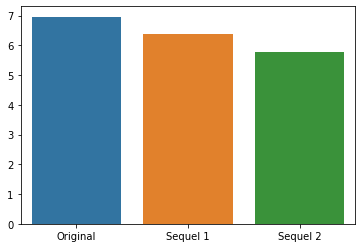

In [ ]:
sns.barplot(
    x=['Original', 'Sequel 1', 'Sequel 2'],
    y=[
        (prequels_imdb_2['imdb_score'].describe()['mean'] + prequels_imdb_3['imdb_score'].describe()['mean']) / 2,
        sequels_imdb_2['imdb_score'].describe()['mean'],
        sequels_imdb_3['imdb_score'].describe()['mean']
    ]
)

Каждое последующее продолжение оригинального шоу в среднем оценивается хуже